# Mini Project 
### Contents
* [Exploratory Data Analysis](#EDA)
* [Data preparation](#DP)
* [Model Helper Functions](#mp)
* [XGBoost Classifier](#XGB)
    * [Feature Importance](#fi)
* [Multilayer Perceptron](#MLP)
* [Accuracy vs Number of Features](#AC)
* [PCA](#PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import shap
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import cm

In [2]:
data = pd.read_csv("../Data/DataSet_HAR.csv")
subjects = data['subject'].drop_duplicates()
data.set_index('subject', inplace = True)


   # EDA  <a class = 'anchor' id = 'EDA'></a>
   
  

In [3]:
data.shape

(10299, 562)

In [4]:
data.isnull().sum().sum()

0

<Figure size 1080x576 with 0 Axes>

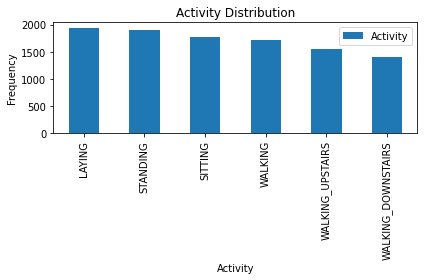

In [5]:
fig = plt.figure(figsize=(15,8))
data[['Activity']].apply(pd.value_counts).plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Activity Distribution')
#plt.show()
plt.tight_layout()
plt.savefig("Activity Distribution")

In [6]:
columns = data.columns
columns = columns[0:561]

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

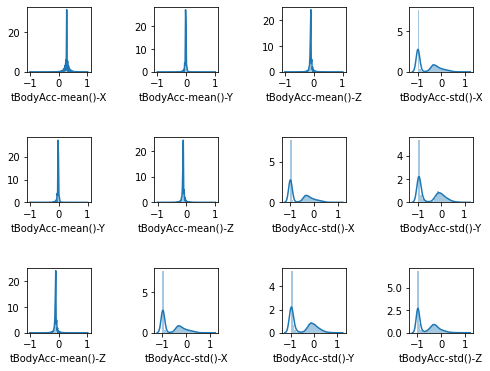

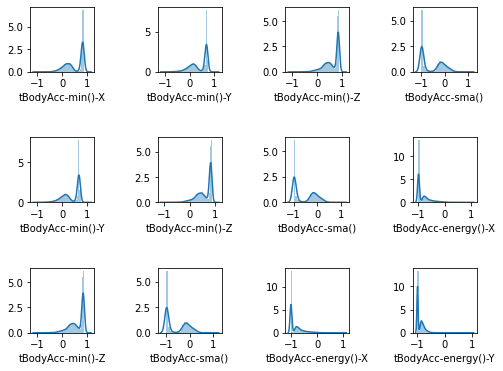

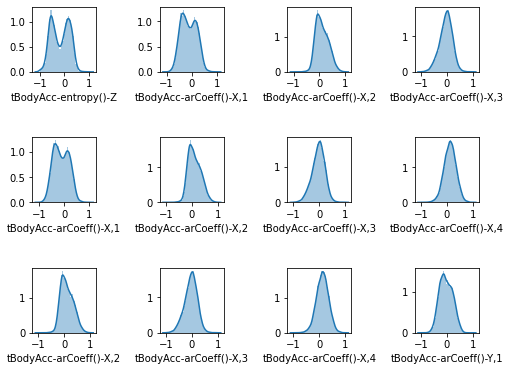

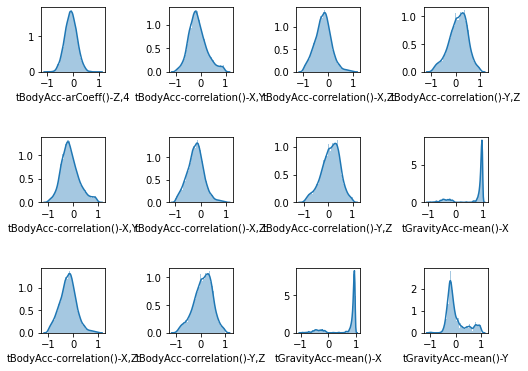

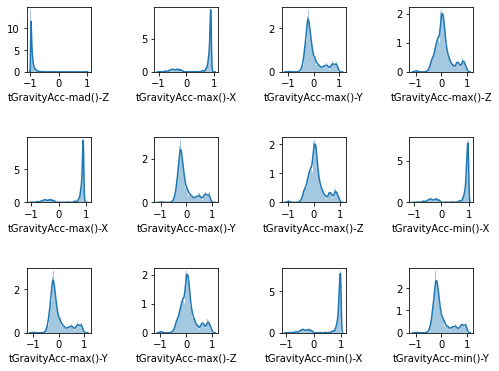

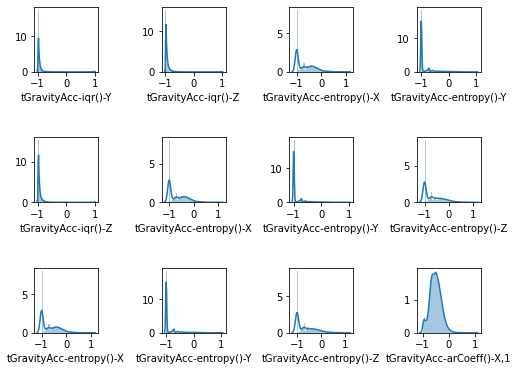

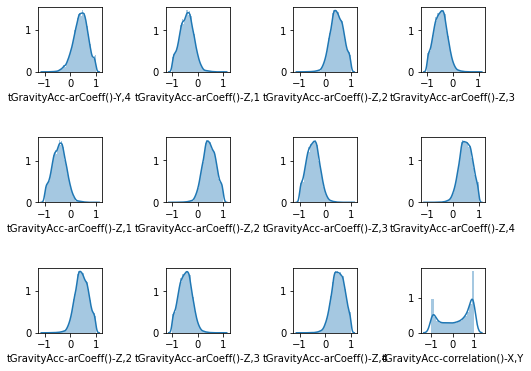

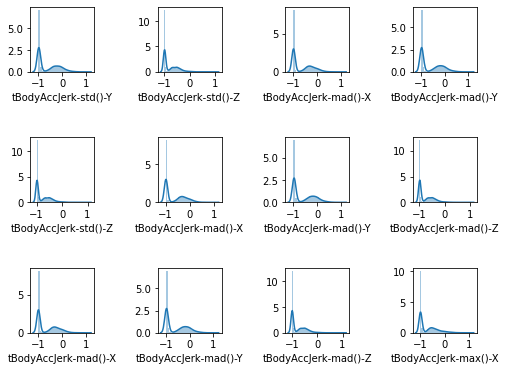

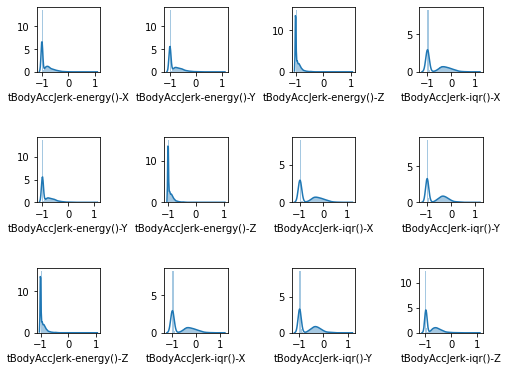

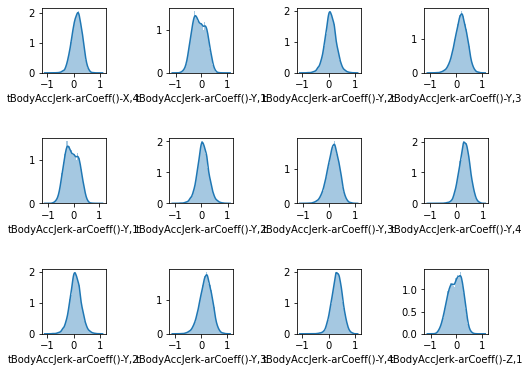

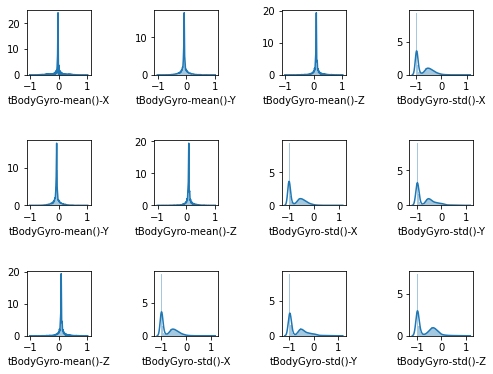

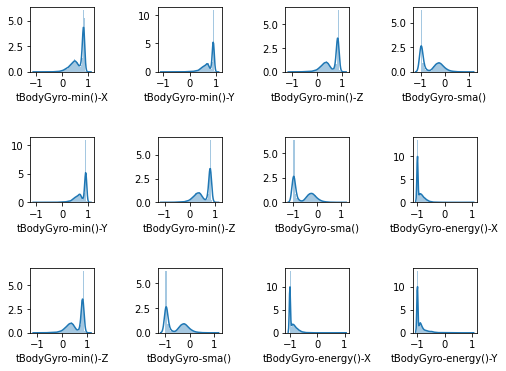

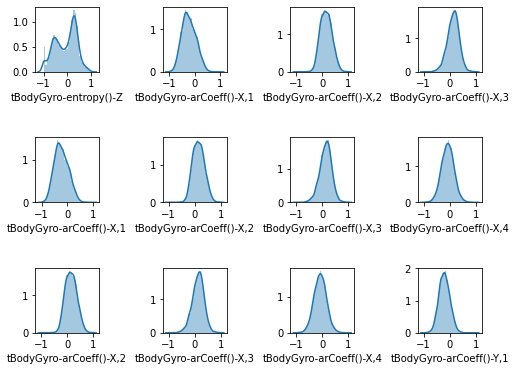

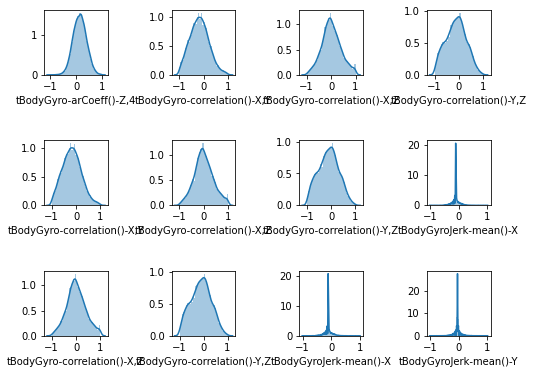

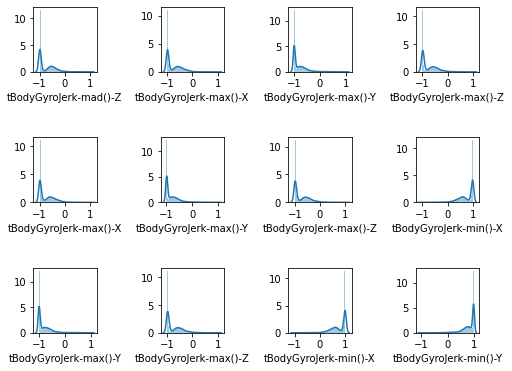

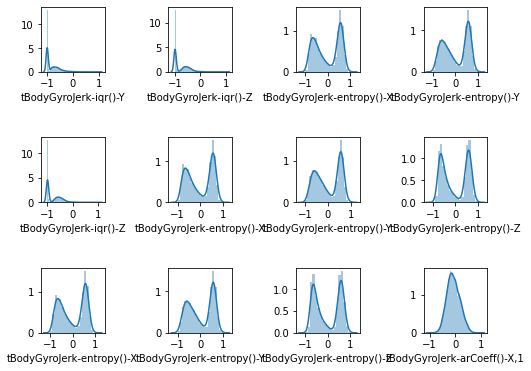

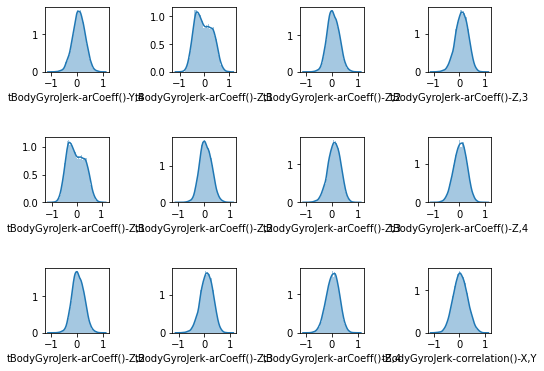

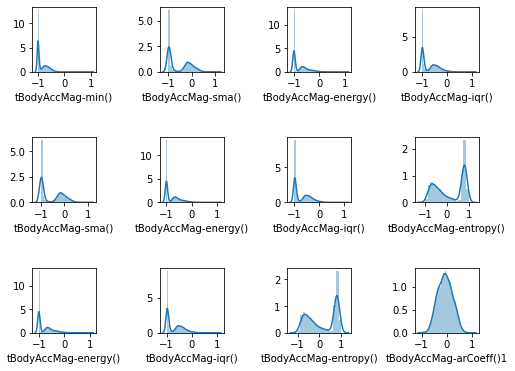

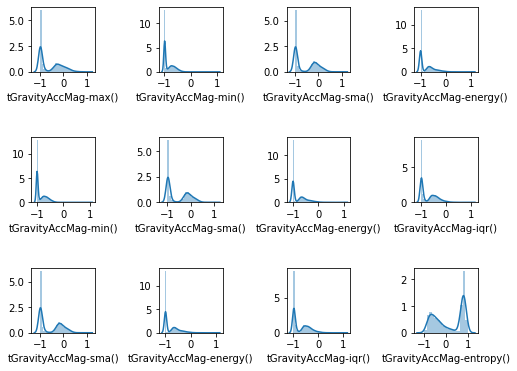

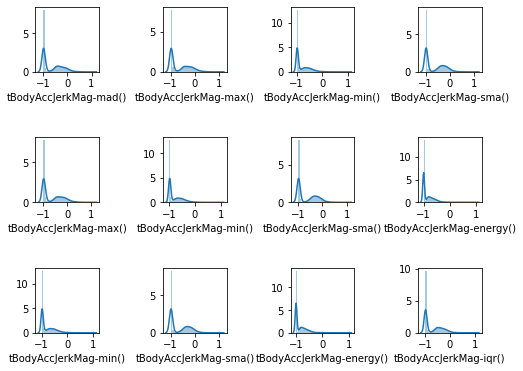

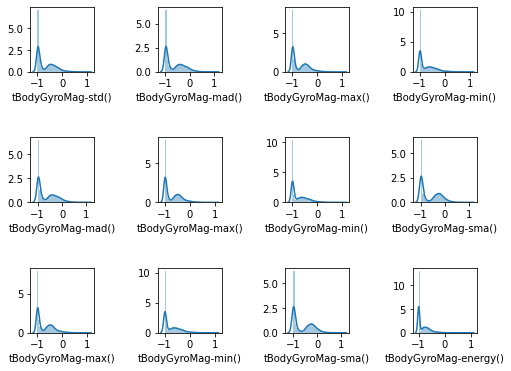

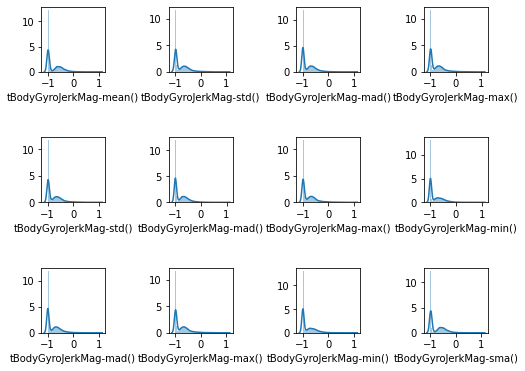

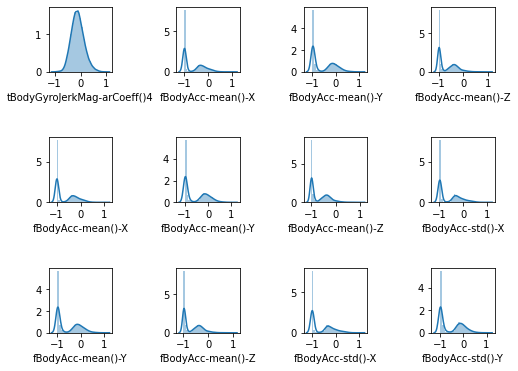

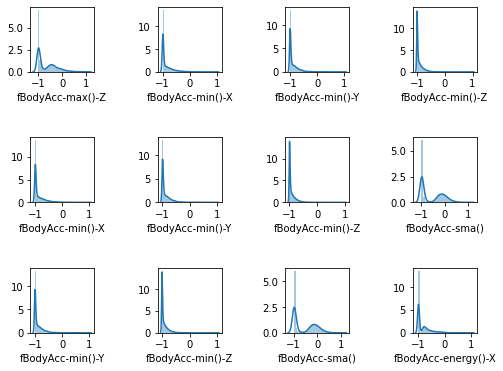

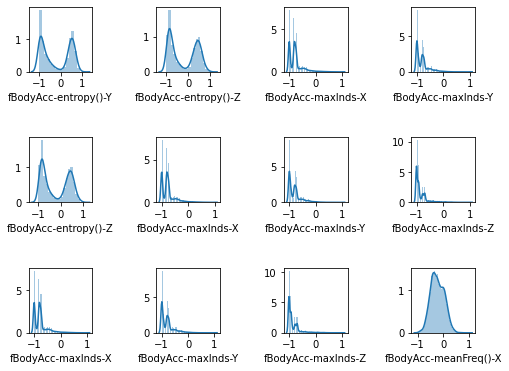

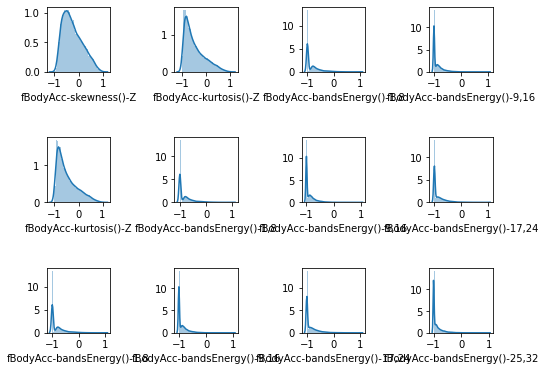

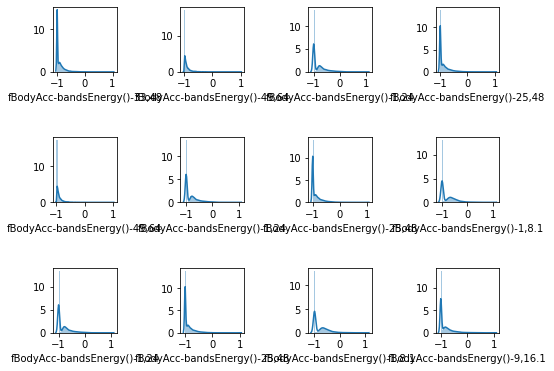

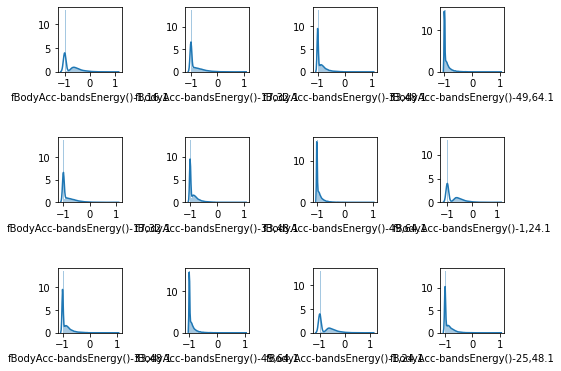

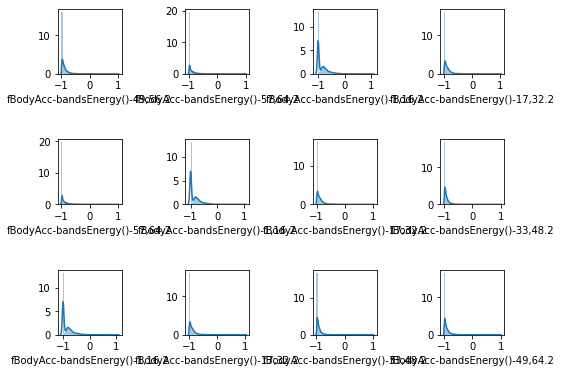

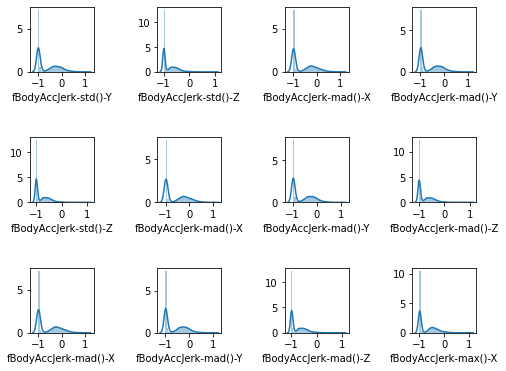

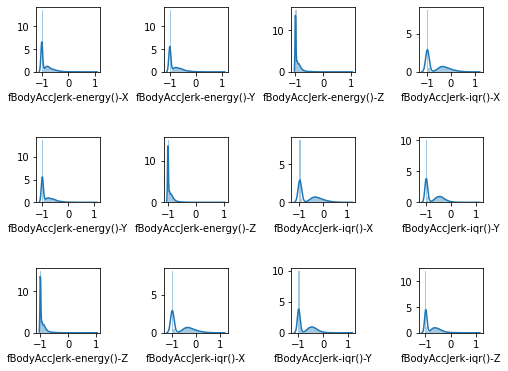

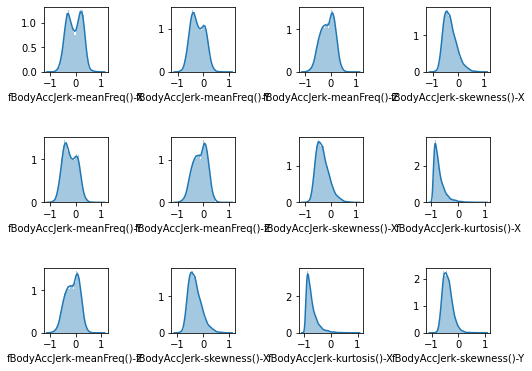

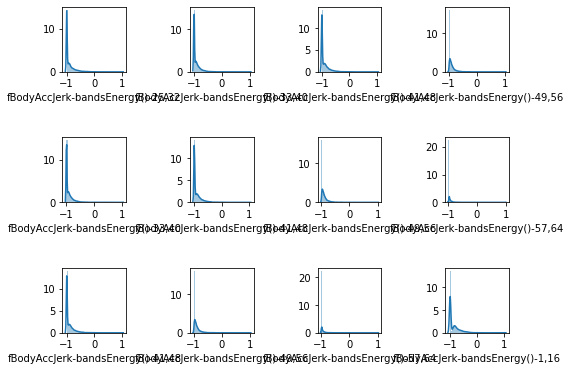

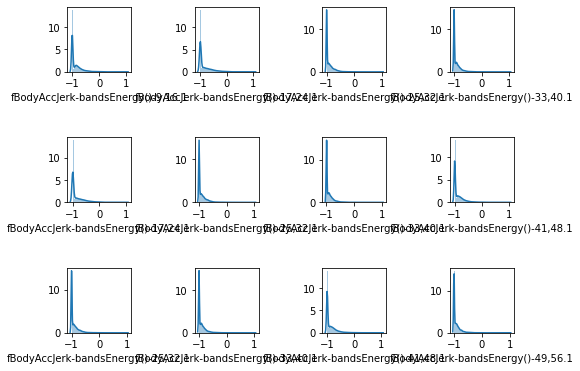

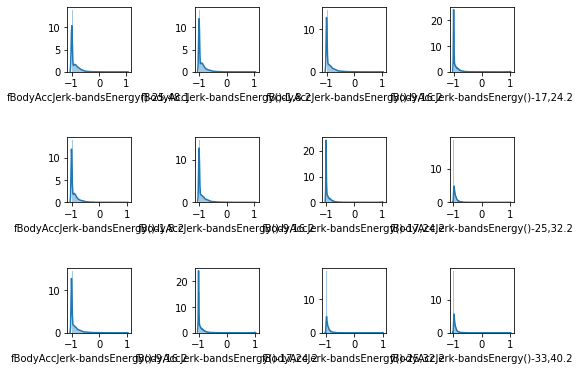

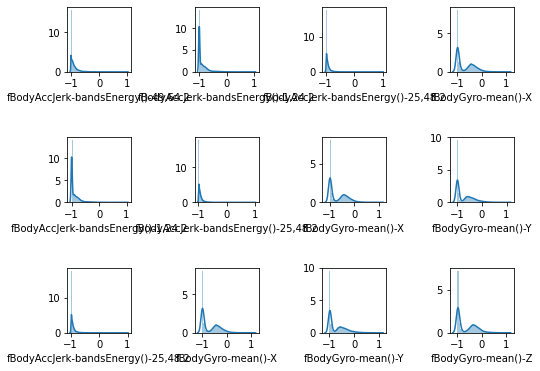

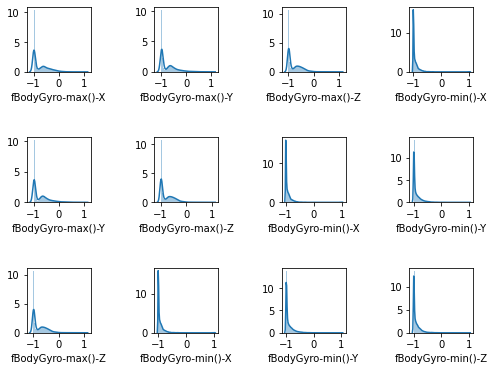

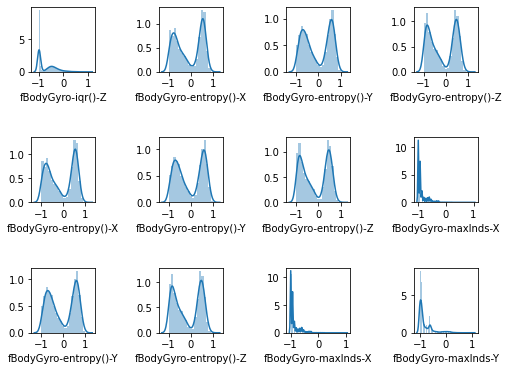

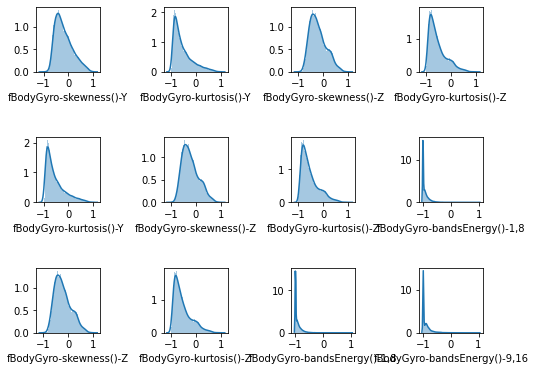

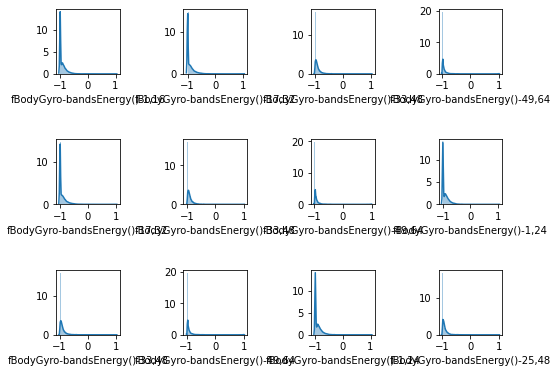

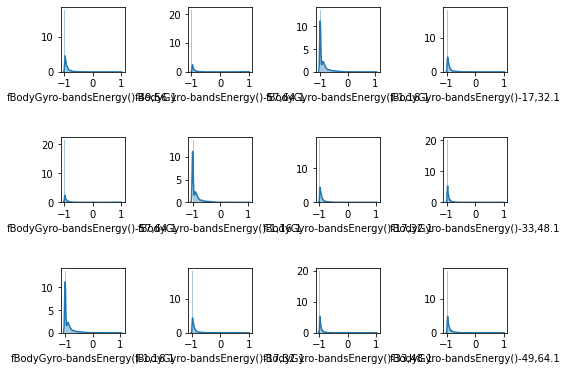

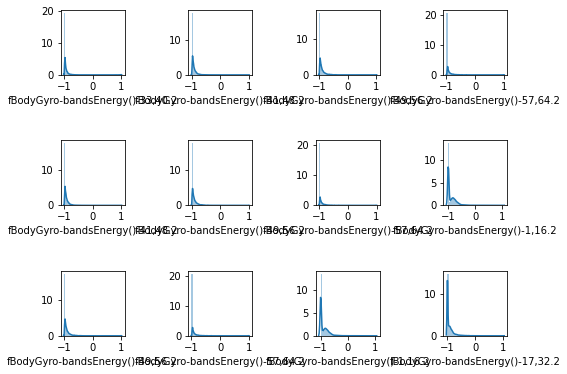

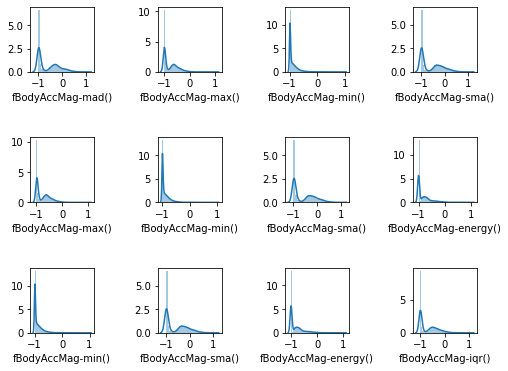

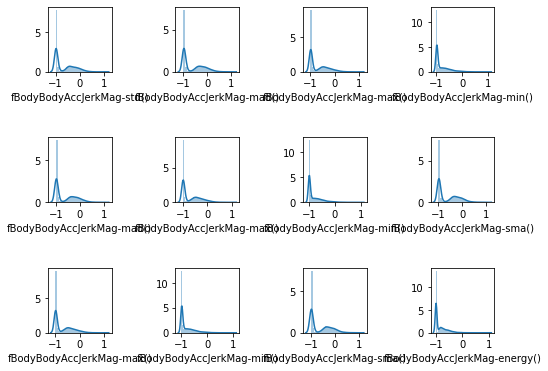

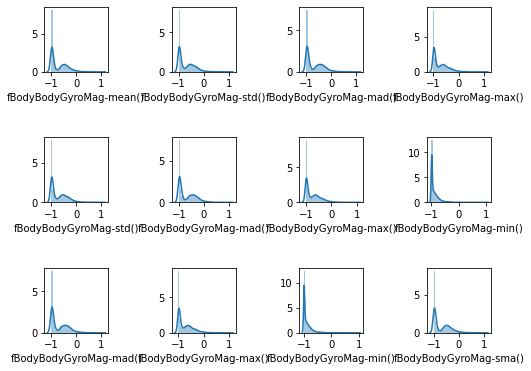

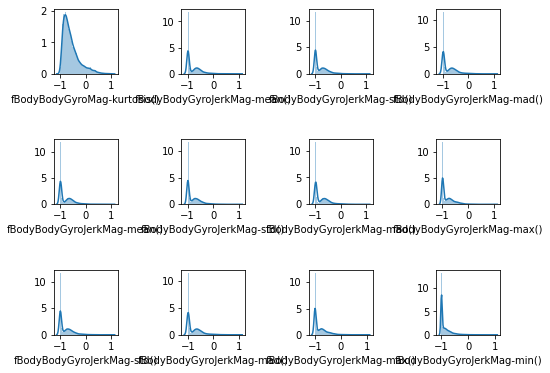

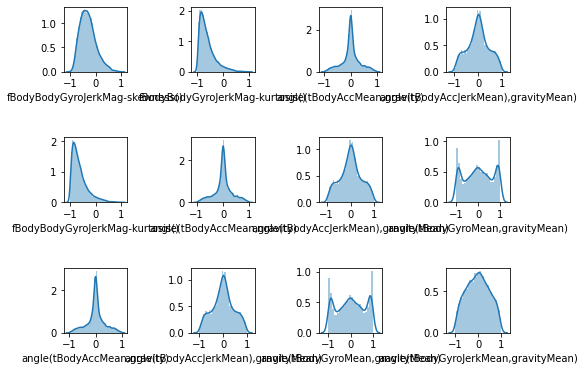

In [7]:

for i in range(47):
    fig, axs = plt.subplots(3,4)
    fig.subplots_adjust(hspace=1,wspace = 1)
    fig.set_size_inches(8,6)
    for j in range(3):
        for k in range(4):
            sns.distplot(data[columns[i*12 + j + k]], ax = axs[j,k])
    #fig.savefig('../Plots/dist_' + str(i) + '.png', dpi=100)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

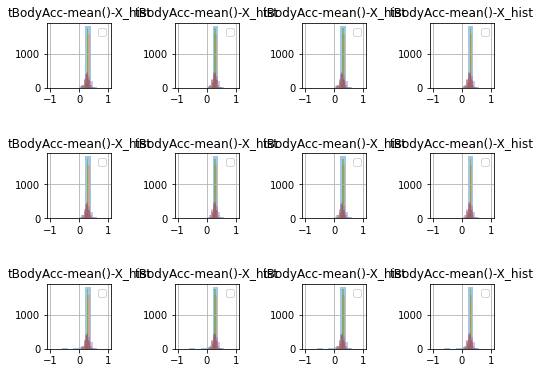

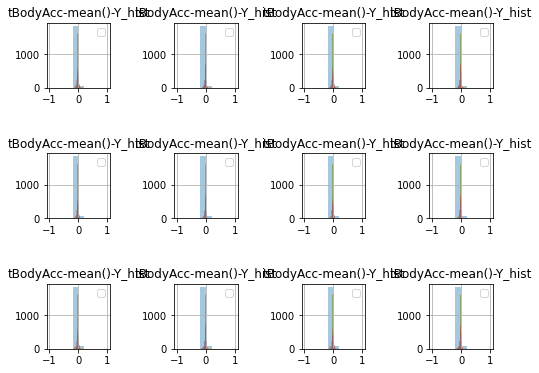

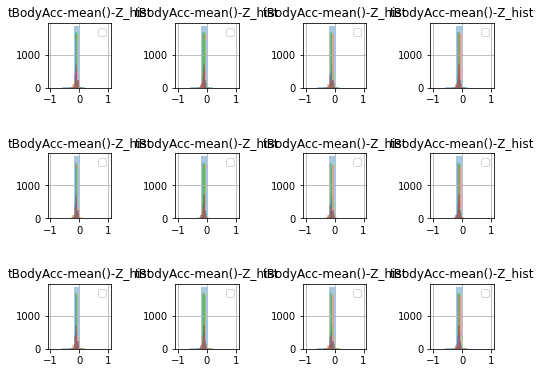

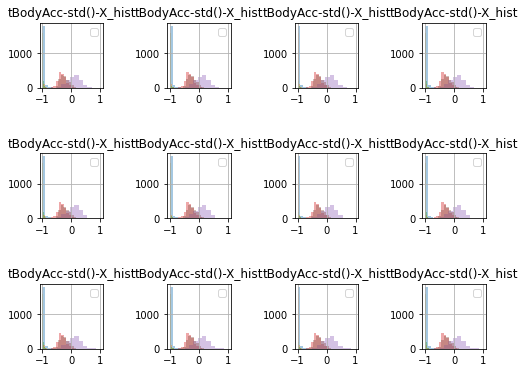

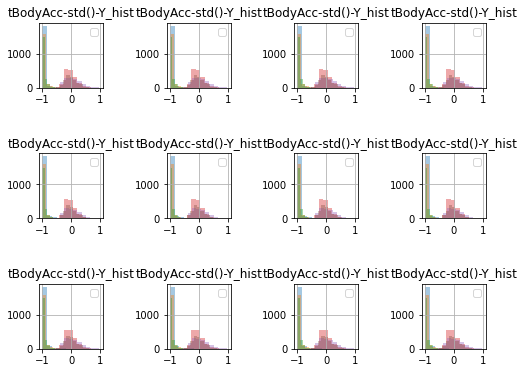

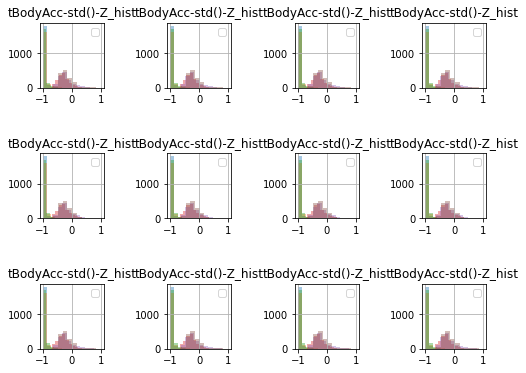

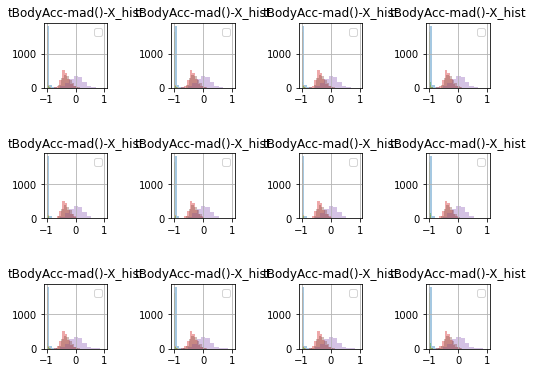

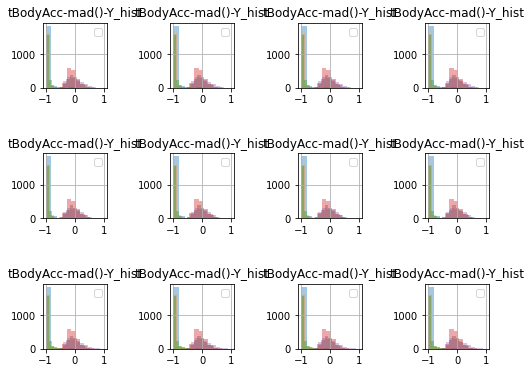

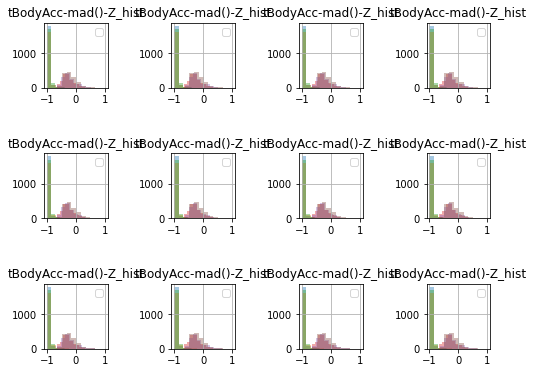

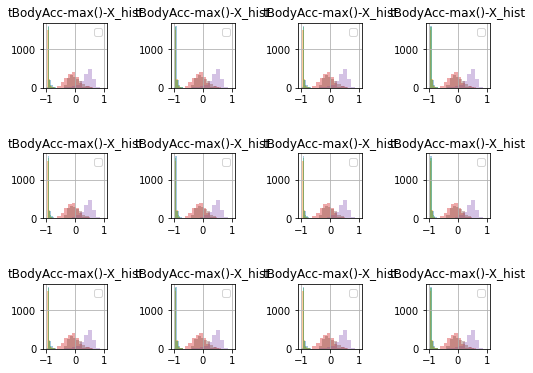

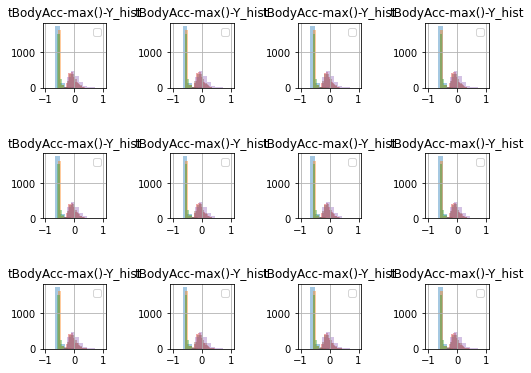

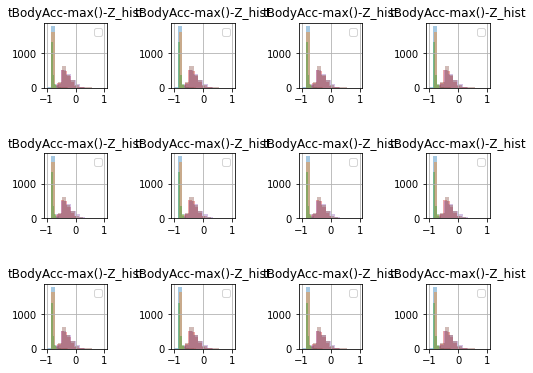

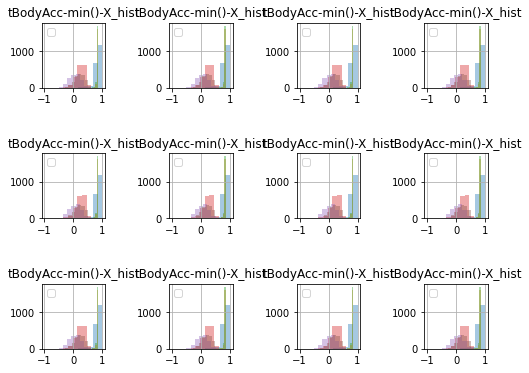

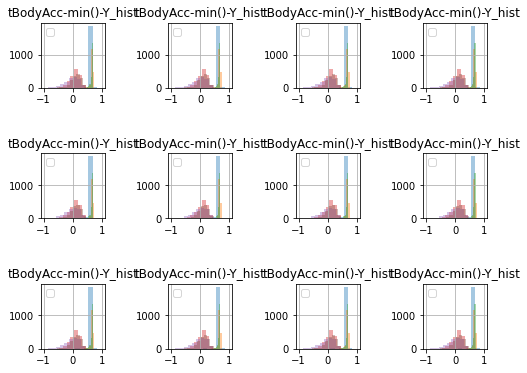

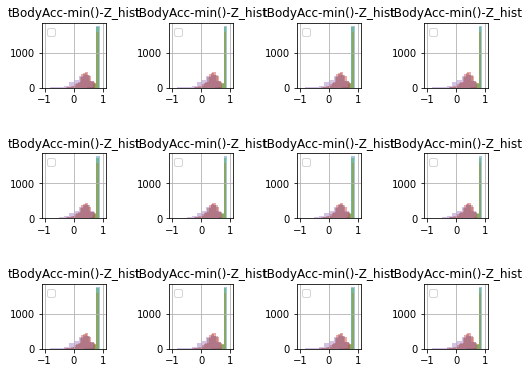

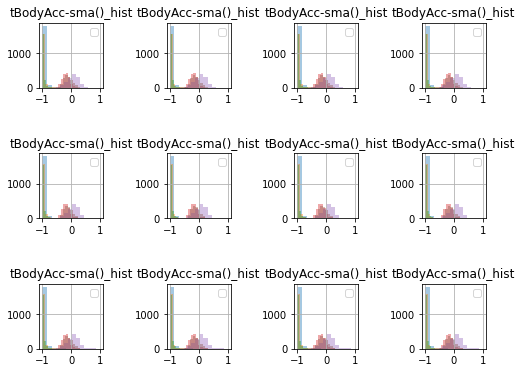

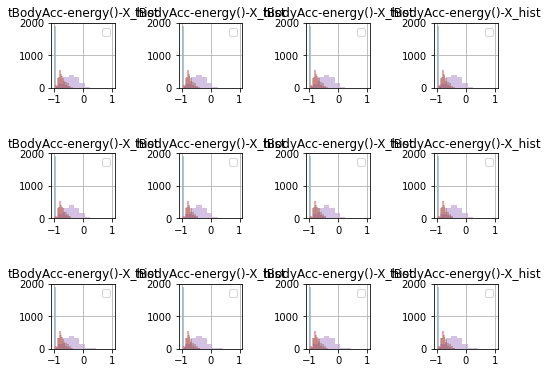

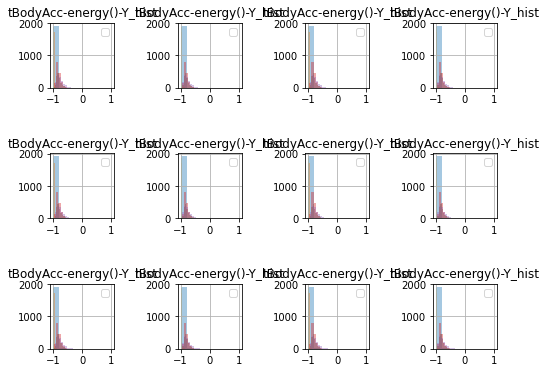

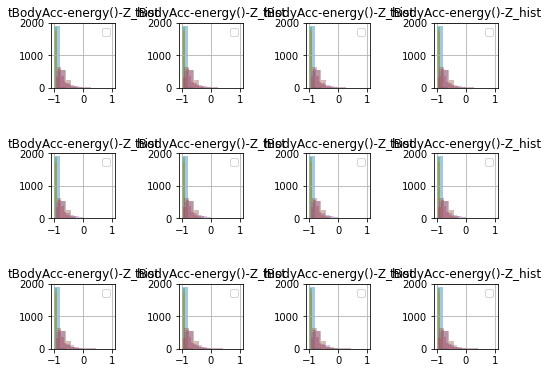

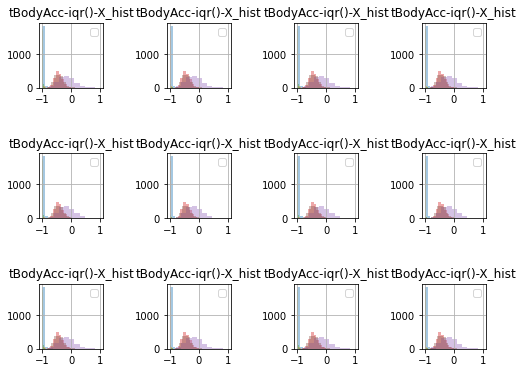

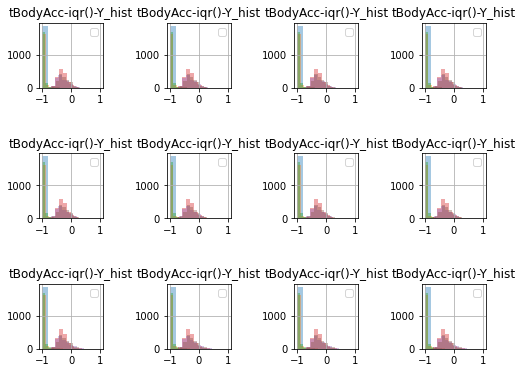

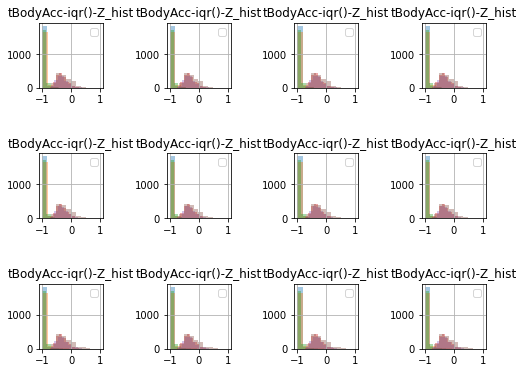

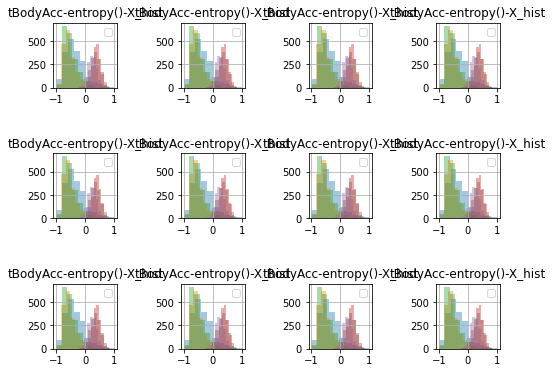

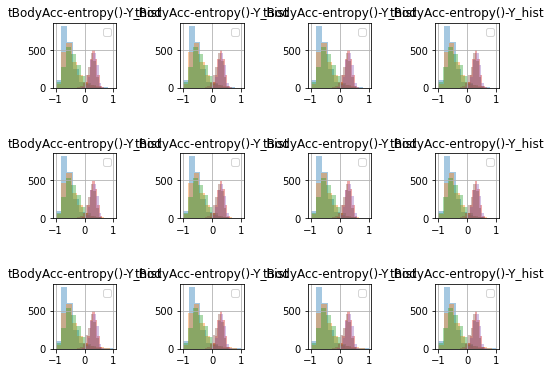

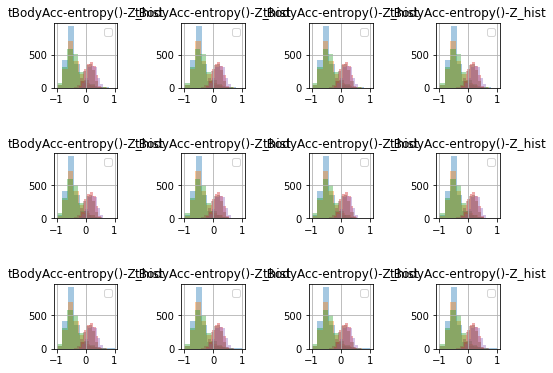

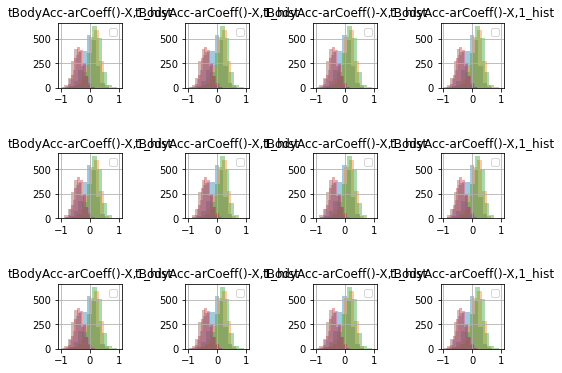

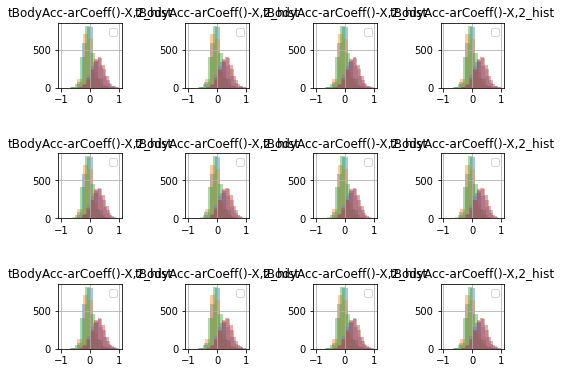

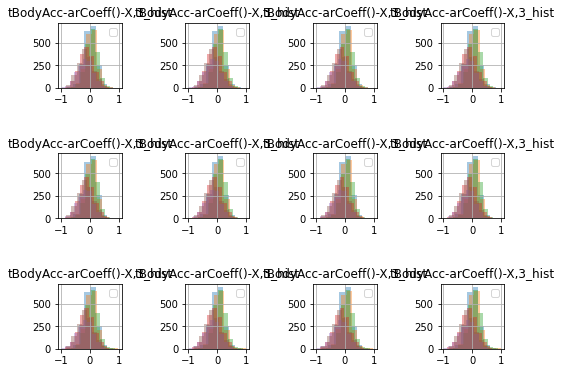

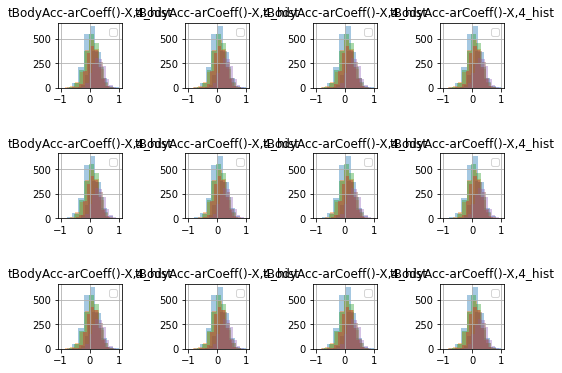

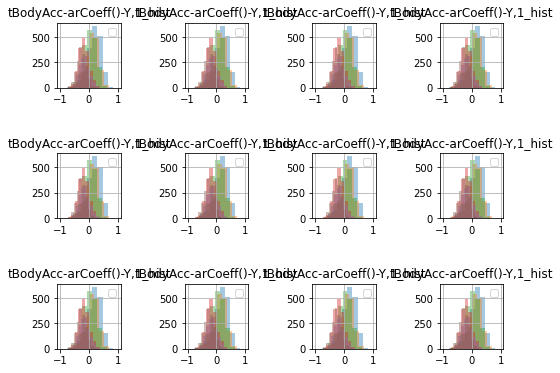

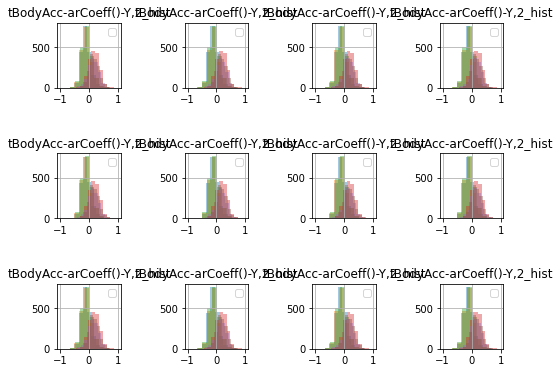

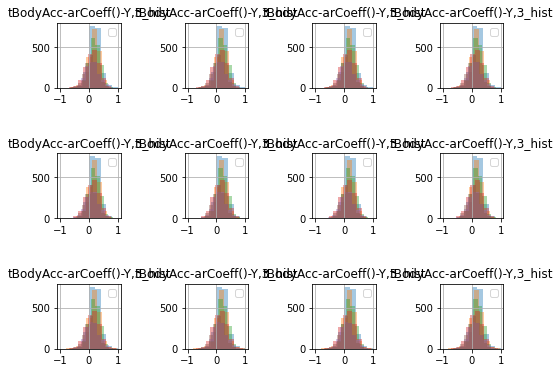

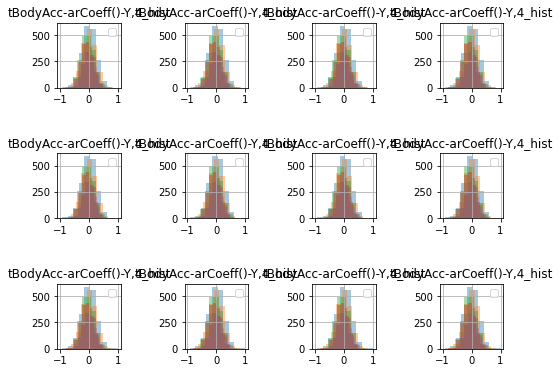

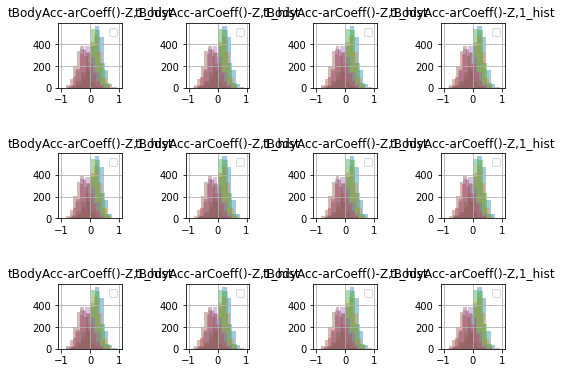

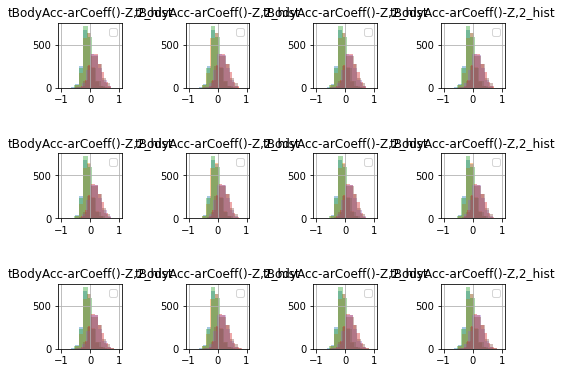

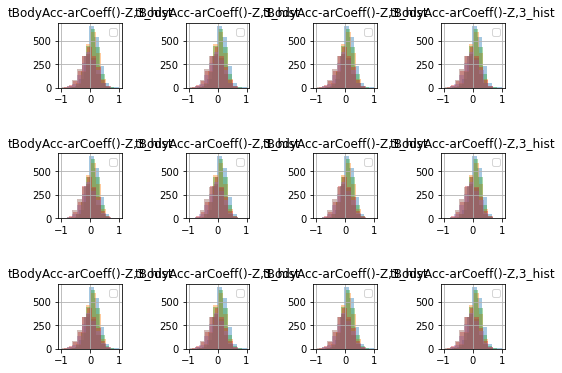

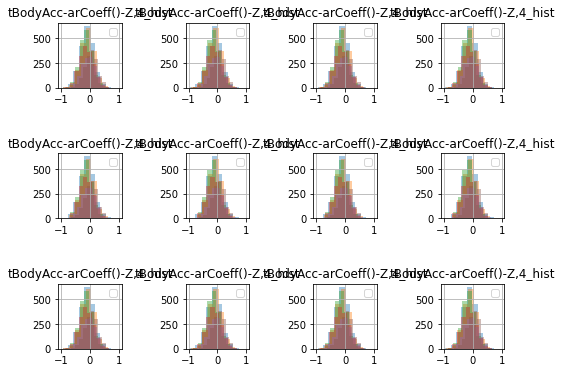

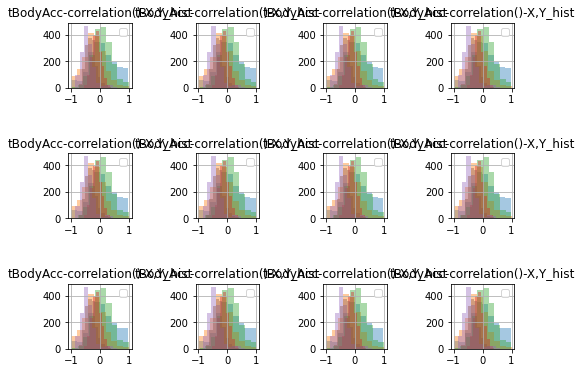

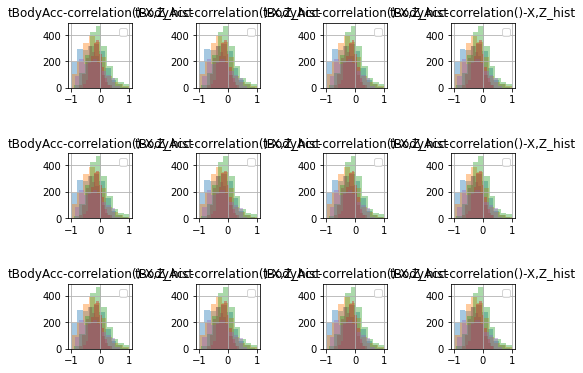

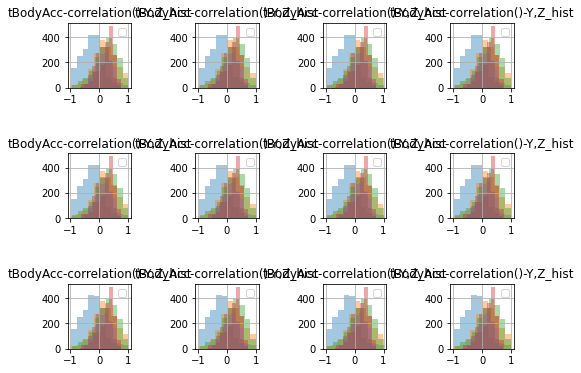

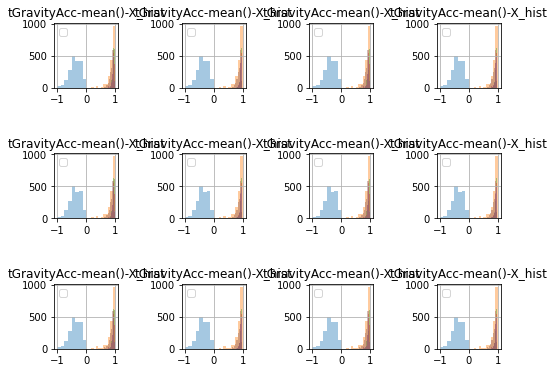

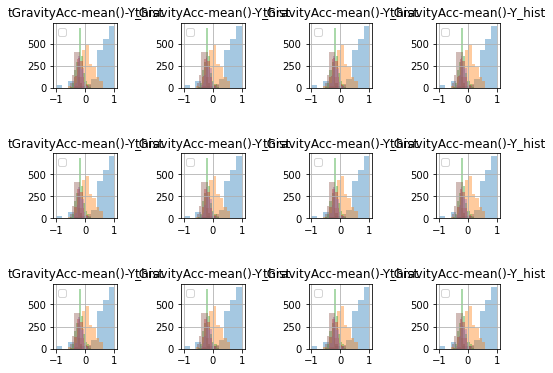

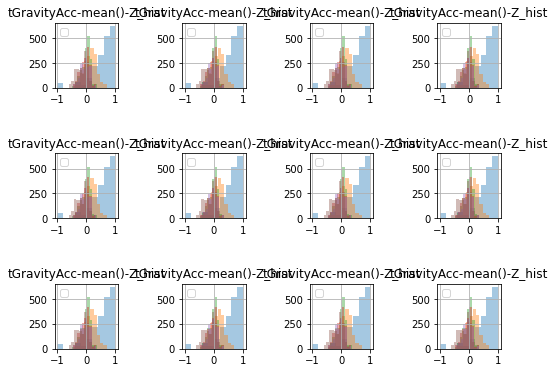

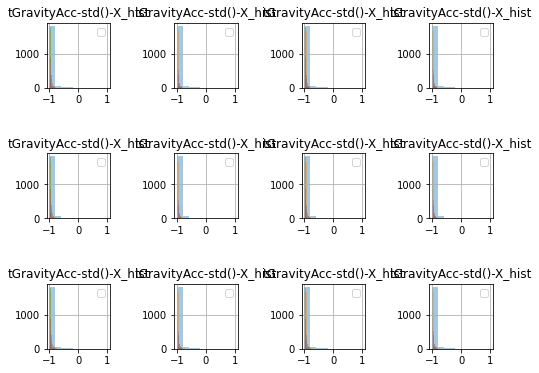

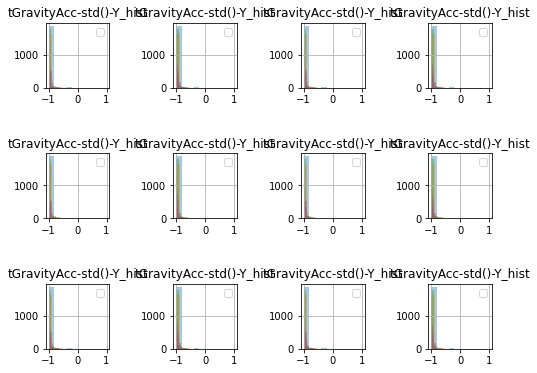

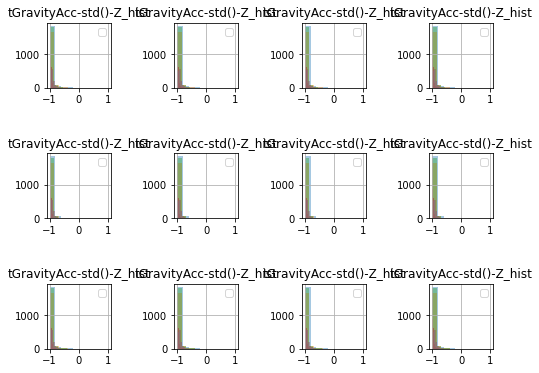

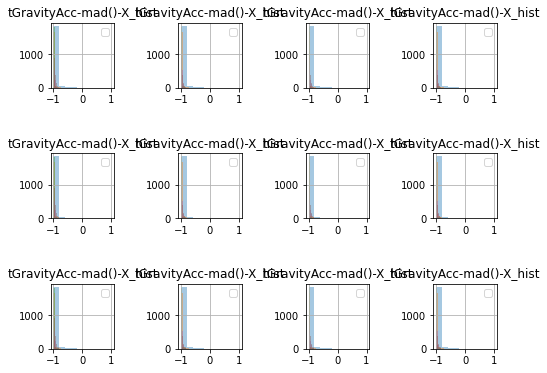

In [8]:

for i in range(len(columns[0:47])):
    fig, axs = plt.subplots(3,4)
    fig.subplots_adjust(hspace=1,wspace = 1)
    fig.set_size_inches(8,6)
    for j in range(3):
        for k in range(4):
            ax = axs[j,k]
            data.groupby('Activity')[columns[i]].hist(alpha=0.4, ax=ax)
            ax.set_title(columns[i] + '_hist')
            ax.legend()
            
   # fig.savefig('../Plots/classwise_dist_' + str(i) + '.png', dpi=100)


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.


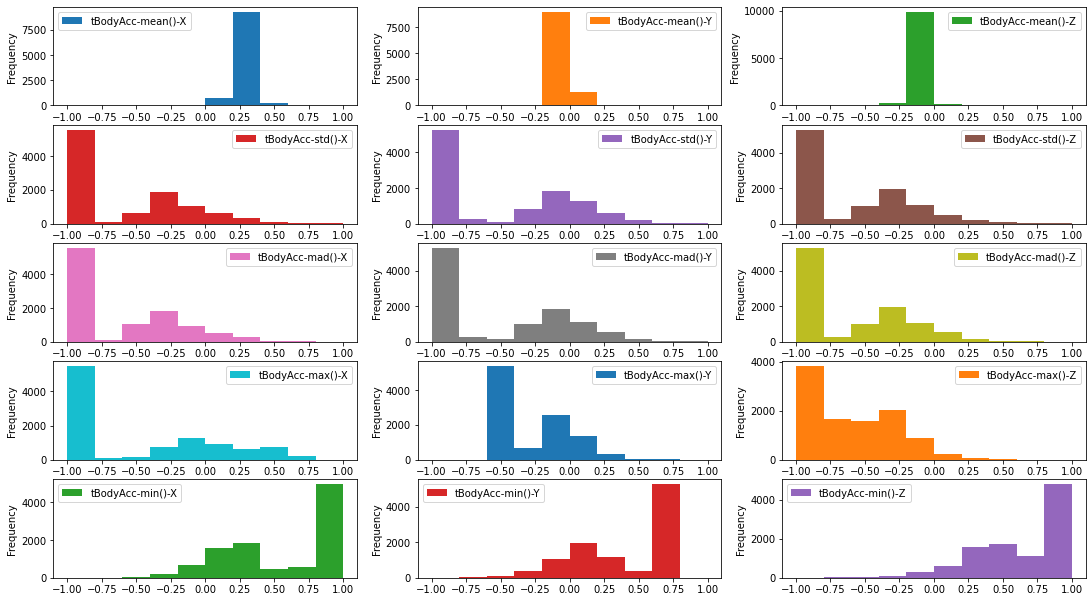

In [9]:

fig, axes = plt.subplots(nrows=5, ncols=3)
data[data.columns[0:15]].plot(subplots = True, ax = axes, kind = 'hist', bins = 10)
fig.set_size_inches(18.5, 10.5)
plt.savefig('body_Acc.png')

In [10]:

def save_plot(column):
    fig,ax = plt.subplots()
    g = data.groupby('Activity')

    num_groups = g.ngroups

    for i, group in g:
        group[column].hist(alpha=0.7, ax =ax , label=i)

    ax.legend()
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(column + " Distribution")
    plt.savefig(column + ".png")


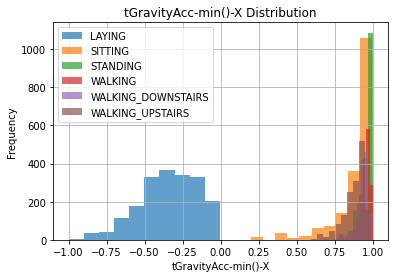

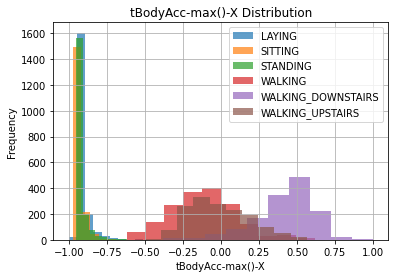

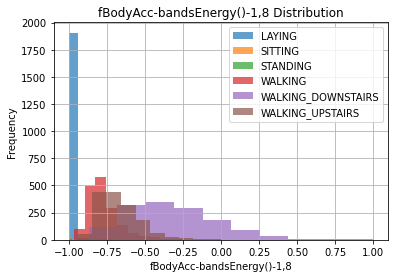

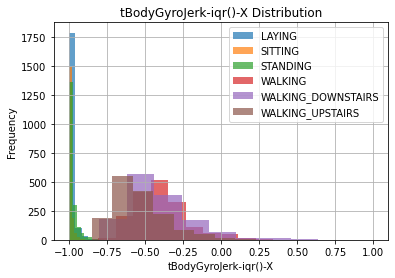

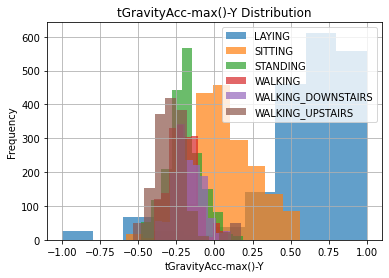

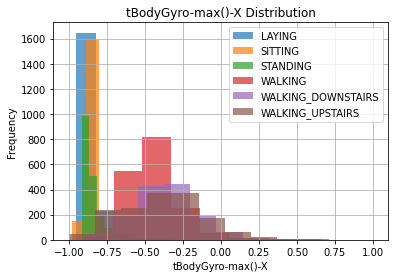

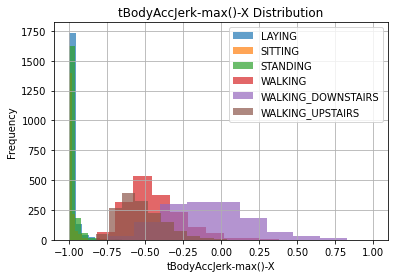

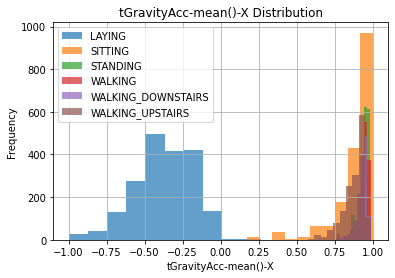

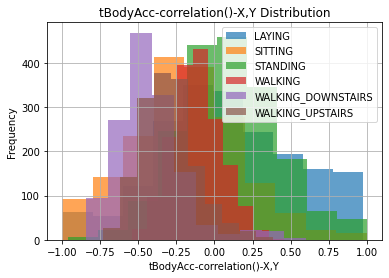

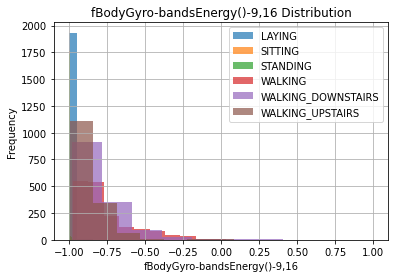

In [11]:
l = ['tGravityAcc-min()-X', 'tBodyAcc-max()-X',
       'fBodyAcc-bandsEnergy()-1,8', 'tBodyGyroJerk-iqr()-X',
       'tGravityAcc-max()-Y', 'tBodyGyro-max()-X', 'tBodyAccJerk-max()-X',
       'tGravityAcc-mean()-X', 'tBodyAcc-correlation()-X,Y',
       'fBodyGyro-bandsEnergy()-9,16']
for i in l:
    save_plot(i)

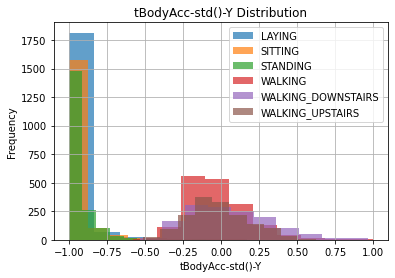

In [12]:
save_plot(data.columns[4])

# Data Prep For model <a class = 'anchor' id = 'DP'></a>

In [13]:
def data_prep(train_set, test_set, columns):
    
    train_set['Activity'] = pd.factorize(train_set['Activity'], sort = True)[0]
    test_set['Activity'] = pd.factorize(test_set['Activity'], sort = True)[0]
    X_train = train_set[columns]
    X_test = test_set[columns]
    y_train = train_set['Activity']
    y_test = test_set['Activity']
    
    return (X_train, X_test, y_train, y_test)

In [14]:
def train_test(X, Y):
    test_size = 0.3
    seed = 123
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    return (X_train, X_test, y_train, y_test)

In [15]:
data_org = data.copy()

In [16]:
X =  data[list(data.columns)[0:561]]

In [17]:
Y = data[list(data.columns)[561]]

encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y)


LabelEncoder()

In [18]:
X_train, X_test, y_train, y_test = train_test(X, encoder.transform(Y))

In [19]:
res = {}
for cl in encoder.classes_:
    res.update({cl:encoder.transform([cl])[0]})
res

{'LAYING': 0,
 'SITTING': 1,
 'STANDING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

# Model Helper Functions <a class = 'anchor' id = 'mp'></a>

In [20]:
def train_model(X, Y, model):
    
    model.fit(X, Y)
    
    return model

In [21]:
def get_confusion_matrix(y_pred, y_true):
    
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels = [0, 1, 2, 3, 4, 5])
    
    return (accuracy, cm)
    

# XGboost Classifier <a class = 'anchor' id = 'XGB'></a>


In [22]:
xgb_model = XGBClassifier()

In [23]:
model = train_model(X_train, y_train, xgb_model)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [24]:
acc_train, cm = get_confusion_matrix(y_train_pred, y_train)
acc_test, cm = get_confusion_matrix(y_test_pred, y_test)

In [25]:
print("Training Accuracy", acc_train)
print("Testing Accuracy", acc_test)

Training Accuracy 0.999445138021917
Testing Accuracy 0.9828478964401295


In [26]:
print(cm)

[[543   0   0   0   0   0]
 [  0 564  23   0   0   0]
 [  0  14 544   0   0   0]
 [  0   0   0 503   0   3]
 [  0   0   0   1 438   9]
 [  0   0   0   2   1 445]]


In [27]:
print(classification_report(list(encoder.inverse_transform(y_test_pred)),list(encoder.inverse_transform(y_test))))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       543
           SITTING       0.96      0.98      0.97       578
          STANDING       0.97      0.96      0.97       567
           WALKING       0.99      0.99      0.99       506
WALKING_DOWNSTAIRS       0.98      1.00      0.99       439
  WALKING_UPSTAIRS       0.99      0.97      0.98       457

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



# Feature importance <a class = 'anchor' id = 'fi'></a>

In [28]:
shap.initjs()


In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


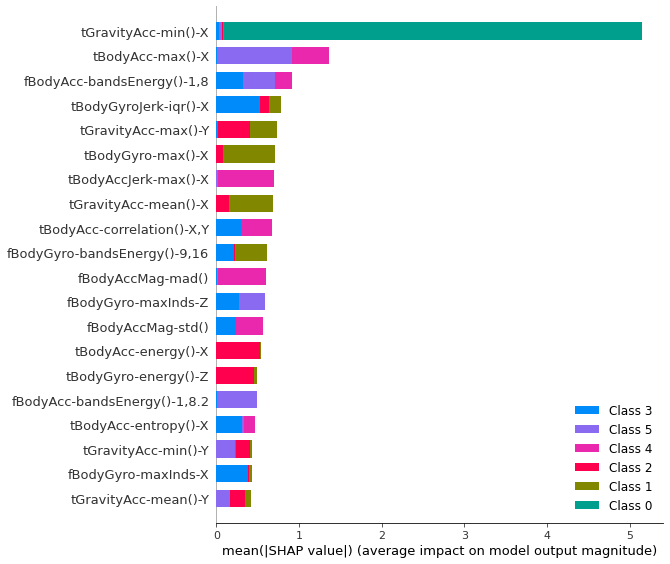

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot summary_plot
shap.summary_plot(shap_values, X_test)
plt.savefig("Feature Importance.png") 

In [31]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_test.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.to_csv('feature importance XgBoost.csv')

In [32]:
feature_importance = feature_importance['col_name'].values

In [33]:
feature_importance[:10]

array(['tGravityAcc-min()-X', 'tBodyAcc-max()-X',
       'fBodyAcc-bandsEnergy()-1,8', 'tBodyGyroJerk-iqr()-X',
       'tGravityAcc-max()-Y', 'tBodyGyro-max()-X', 'tBodyAccJerk-max()-X',
       'tGravityAcc-mean()-X', 'tBodyAcc-correlation()-X,Y',
       'fBodyGyro-bandsEnergy()-9,16'], dtype=object)

# MLP Classifier <a class = 'anchor' id = 'MLP'></a>


In [34]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

In [35]:
model = train_model(X_train, y_train, mlp_model)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [36]:
acc_train, cm = get_confusion_matrix(y_train_pred, y_train)
acc_test, cm = get_confusion_matrix(y_test_pred, y_test)

In [37]:
print("Training Accuracy", acc_train)
print("Testing Accuracy", acc_test)

Training Accuracy 0.9933416562630045
Testing Accuracy 0.983495145631068


In [38]:
print(cm)

[[543   0   0   0   0   0]
 [  0 551  36   0   0   0]
 [  0  15 543   0   0   0]
 [  0   0   0 506   0   0]
 [  0   0   0   0 448   0]
 [  0   0   0   0   0 448]]


In [39]:
print(classification_report(list(encoder.inverse_transform(y_test_pred)),list(encoder.inverse_transform(y_test))))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       543
           SITTING       0.94      0.97      0.96       566
          STANDING       0.97      0.94      0.96       579
           WALKING       1.00      1.00      1.00       506
WALKING_DOWNSTAIRS       1.00      1.00      1.00       448
  WALKING_UPSTAIRS       1.00      1.00      1.00       448

          accuracy                           0.98      3090
         macro avg       0.99      0.99      0.99      3090
      weighted avg       0.98      0.98      0.98      3090



# Identifying Accuracy vs Number of Columns required <a class = 'anchor' id = 'AC'></a>

In [40]:
accuracy = []

for i in range(1,50):
    columns = feature_importance[0:i]
    columns = list(columns)
    xgb_model = XGBClassifier()
    model = train_model(X_train[columns], y_train, xgb_model)
    y_pred = model.predict(X_test[columns])
    acc, cm = get_confusion_matrix(y_pred, y_test)
    accuracy.append(acc)

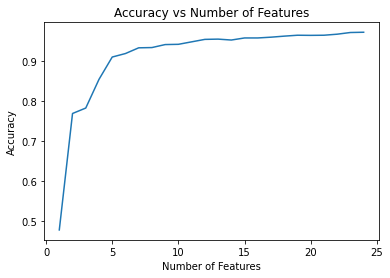

In [41]:
plt.plot( list(range(1,25)), accuracy[0:24])
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features")
#plt.show()
plt.savefig("Accuracy vs Numbrt of Features")

In [42]:
for i,v  in enumerate(accuracy):
    print(i,v)

0 0.47896440129449835
1 0.7692556634304207
2 0.7828478964401294
3 0.8543689320388349
4 0.9100323624595469
5 0.9187702265372168
6 0.933009708737864
7 0.9336569579288025
8 0.9411003236245955
9 0.941747572815534
10 0.9478964401294498
11 0.9540453074433657
12 0.9546925566343042
13 0.9524271844660194
14 0.9576051779935275
15 0.9576051779935275
16 0.959546925566343
17 0.962135922330097
18 0.9644012944983819
19 0.9640776699029127
20 0.9644012944983819
21 0.9669902912621359
22 0.9711974110032362
23 0.9718446601941747
24 0.9724919093851133
25 0.9744336569579288
26 0.974757281553398
27 0.9744336569579288
28 0.9766990291262136
29 0.976051779935275
30 0.9766990291262136
31 0.9783171521035599
32 0.9770226537216828
33 0.9776699029126213
34 0.9783171521035599
35 0.9786407766990292
36 0.9773462783171522
37 0.9770226537216828
38 0.9773462783171522
39 0.9792880258899677
40 0.9799352750809062
41 0.9796116504854369
42 0.9799352750809062
43 0.9802588996763754
44 0.9818770226537217
45 0.9802588996763754
46 

# PCA <a class = 'anchor' id = 'PCA'></a>

In [43]:
pca = PCA( svd_solver='full')

In [44]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [45]:
pca_sum = pca.explained_variance_ratio_.cumsum()

In [46]:
for i,val in enumerate(pca_sum):
    print(i,val)

0 0.6213191509360887
1 0.6690439158761174
2 0.7101895664303178
3 0.7282955314016323
4 0.7442933457983333
5 0.7563780875929237
6 0.7680779438541305
7 0.778849461786121
8 0.7885961995118298
9 0.7975363947154929
10 0.806138906526078
11 0.812802145092441
12 0.8193015501125922
13 0.8249969541247892
14 0.8301922452582954
15 0.8353279612340336
16 0.8400925866768209
17 0.8445472840964382
18 0.8488934542732284
19 0.8530796747545539
20 0.8572380562950785
21 0.8611138478727022
22 0.8648026251940347
23 0.8683336620407003
24 0.8718037939048434
25 0.8751206548697898
26 0.8782943844201715
27 0.881331146739184
28 0.8842878314041396
29 0.8871564217569667
30 0.8899504040262991
31 0.8926383458433894
32 0.8952958130609344
33 0.8977578011462428
34 0.9001028094889316
35 0.9023910625509695
36 0.9046288760168043
37 0.9067964792524318
38 0.9089048470132982
39 0.9109946621840129
40 0.9129939268853404
41 0.9149636490397753
42 0.9168962043841627
43 0.9187669579719339
44 0.9205417417265305
45 0.9222353396707584
46

362 0.9998816693139085
363 0.999885435388165
364 0.9998891141051343
365 0.9998926682506766
366 0.9998961032035409
367 0.9998995214795693
368 0.9999027641022585
369 0.9999059547775796
370 0.9999091410785922
371 0.9999122366714118
372 0.9999152762961178
373 0.9999182012244865
374 0.9999210240603793
375 0.9999238264094998
376 0.9999266202451913
377 0.9999292361622758
378 0.9999318115521083
379 0.9999342809231216
380 0.9999367193342933
381 0.999939071288699
382 0.9999413650215914
383 0.9999436265348459
384 0.9999458153728278
385 0.9999479539728452
386 0.9999499874053731
387 0.9999519690125606
388 0.9999539159909681
389 0.9999557910629685
390 0.9999575262277063
391 0.9999591693376894
392 0.9999608016182071
393 0.9999623901564126
394 0.9999639552493905
395 0.9999654778469184
396 0.9999669551705362
397 0.9999683770345726
398 0.9999697219417385
399 0.9999710261911323
400 0.9999723243634618
401 0.9999735788992232
402 0.9999747819661725
403 0.99997597940424
404 0.999977167622745
405 0.9999783007

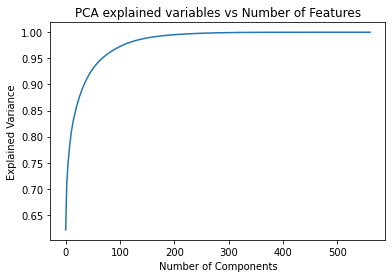

In [47]:
plt.plot(pca_sum)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA explained variables vs Number of Features")
#plt.show()
plt.savefig("Explained Variance.png")

In [48]:
accuracy = []

for i in range(1,30):
    xgb_model = XGBClassifier()
    model = train_model(pca.transform(X_train)[:,0:i], y_train, xgb_model)
    y_pred = model.predict(pca.transform(X_test)[:,0:i])
    acc, cm = get_confusion_matrix(y_pred, y_test)
    accuracy.append(acc)

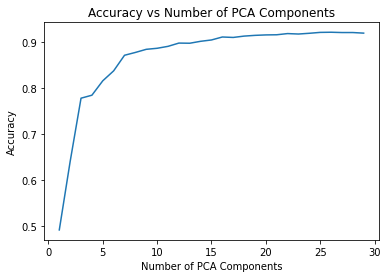

In [52]:
plt.plot( list(range(1,30)), accuracy[0:29])
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA Components")
#plt.show()
plt.savefig("Accuracy vs Number of PCA Components")

In [50]:
for i,val in enumerate(accuracy):
    print(i,val)

0 0.49093851132686084
1 0.6401294498381876
2 0.7779935275080906
3 0.7844660194174757
4 0.8158576051779936
5 0.8375404530744337
6 0.8715210355987055
7 0.8776699029126214
8 0.8844660194174757
9 0.8867313915857605
10 0.8909385113268609
11 0.8980582524271845
12 0.8977346278317152
13 0.9019417475728155
14 0.9048543689320389
15 0.911326860841424
16 0.9103559870550162
17 0.9132686084142395
18 0.9148867313915857
19 0.9158576051779935
20 0.9161812297734628
21 0.9187702265372168
22 0.917799352750809
23 0.9194174757281554
24 0.9213592233009709
25 0.9216828478964402
26 0.9210355987055017
27 0.9210355987055017
28 0.9197411003236245
